In [3]:
# glmExplainer Examples

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes, load_iris
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, f1_score
from matplotlib import pyplot as plt
from transparency.python.explainer.glm import glmExplainerTransformer

In [14]:
# loading the diabetes dataset

columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split()
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=columns)
y = diabetes.target

# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# model training
clf = linear_model.Ridge()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# regression evaluation: r2 score
r2_eval = r2_score(y_test, y_pred)
print('r2 score = ', r2_eval)

clf.predict(np.zeros((1, X_train.shape[1])))[0]

# prediction explanation generation
expl = glmExplainerTransformer(clf)
df = expl.transform(X_test)

assert((np.abs(df['feature_contributions'].apply(lambda x: sum(x[0])) + \
               df['intercept_contribution'] - df['prediction']) < .01).all())

r2 score =  0.42317022056049347


f1 score =  1.0


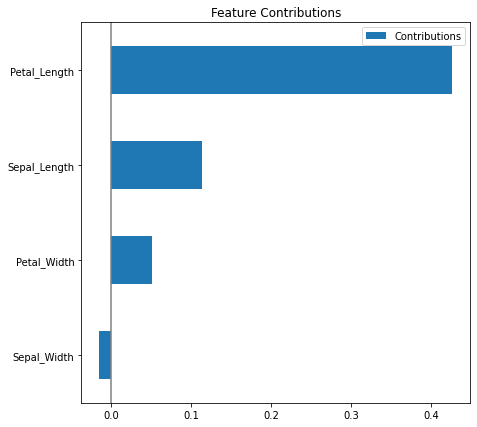

In [15]:
# loading the iris dataset

columns = 'Sepal_Length Sepal_Width Petal_Length Petal_Width'.split()
iris = load_iris()
y = iris.target
X = pd.DataFrame(iris.data, columns=columns).iloc[y<2, :]
y = y[y<2]


# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# model training
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# regression evaluation: r2 score
f1_eval = f1_score(y_test, y_pred)
print('f1 score = ', f1_eval)

clf.predict(np.zeros((1, X_train.shape[1])))[0]


# prediction explanation generation
expl = glmExplainerTransformer(clf)
df = expl.transform(X_test)

assert((np.abs(df['feature_contributions'].apply(lambda x: sum(x[0])) + \
               df['intercept_contribution'] - df['prediction']) < .01).all())

# Plotting mean feature contributions over the total population
plot_contrib_df = pd.DataFrame(np.mean(df['feature_contributions'].apply(lambda x: x[0]), axis=0),
                               index=columns, columns=['Contributions'])

final_plot_contrib_df = plot_contrib_df.iloc[plot_contrib_df['Contributions'].abs().argsort()]
final_plot_contrib_df.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Contributions')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()

f1 score =  1.0


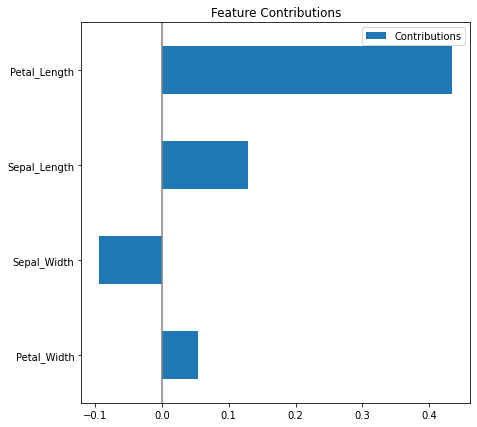

In [16]:
# loading the iris dataset with proba output

columns = 'Sepal_Length Sepal_Width Petal_Length Petal_Width'.split()
iris = load_iris()
y = iris.target
X = pd.DataFrame(iris.data, columns=columns).iloc[y<2, :]
y = y[y<2]


# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# model training
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# regression evaluation: r2 score
f1_eval = f1_score(y_test, y_pred)
print('f1 score = ', f1_eval)

clf.predict(np.zeros((1, X_train.shape[1])))[0]


# prediction explanation generation
expl = glmExplainerTransformer(clf, output_proba=True)
df = expl.transform(X_test)

assert((np.abs(df['feature_contributions'].apply(lambda x: sum(x[0])) + \
               df['intercept_contribution'] - df['prediction']) < .01).all())

# Plotting mean feature contributions over the total population
plot_contrib_df = pd.DataFrame(np.mean(df['feature_contributions'].apply(lambda x: x[0]), axis=0),
                               index=columns, columns=['Contributions'])

final_plot_contrib_df = plot_contrib_df.iloc[plot_contrib_df['Contributions'].abs().argsort()]
final_plot_contrib_df.plot(kind='barh', figsize=(9, 7))
plt.title('Feature Contributions')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()
